In [1]:
!pip install nltk
!pip install spacy

In [2]:
# A list of all the words in 'movie_reviews'
import nltk
# nltk.download('all')
from nltk.corpus import movie_reviews
movie_reviews.words()

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

In [3]:
# Prints total number of words in 'movie_reviews'
len(movie_reviews.words())

1583820

In [4]:
movie_reviews.categories()

['neg', 'pos']

In [3]:
# Displays frequency of words in ‘movie_reviews’
freq_dist = nltk.FreqDist(movie_reviews.words())

In [4]:
# Prints frequency of the word 'happy'.
print(freq_dist['happy'])
# Prints frequency of the word 'sad'.
print(freq_dist['sad'])
# Prints frequency of the word 'usa'.
print(freq_dist['usa'])
# Prints frequency of the word 'the'.
print(freq_dist['the'])

215
108
19
76529


In [ ]:
# most common words
freq_dist.most_common(15)
# punctuations, prepositions, pronouns, vaux (is)

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822),
 ('s', 18513),
 ('"', 17612),
 ('it', 16107),
 ('that', 15924),
 ('-', 15595)]

In [6]:
# Prints all file ids
# movie_reviews.fileids()
# Prints file ids of positive reviews
sample_pos_files = movie_reviews.fileids('pos')[: 1000]
# Prints file ids of negative reviews.
sample_neg_files = movie_reviews.fileids('neg')[: 1000]

In [7]:
label_to_category = {1: 'pos', 0: 'neg'}
category_to_label = {'pos': 1, 'neg': 0}
neg_text, neg_labels, pos_text, pos_labels = [], [], [], []
for sample_pos_file in sample_pos_files:
  text = movie_reviews.raw(sample_pos_file)
  # preprocess the data
  text = text.replace('\n', '')
  pos_text.append(text)
  pos_labels.append(1)
for sample_neg_file in sample_neg_files:
  text = movie_reviews.raw(sample_neg_file)
  # preprocess the data
  text = text.replace('\n', '')
  neg_text.append(text)
  neg_labels.append(0)

In [8]:
# combine the data
all_text = pos_text + neg_text
all_labels = pos_labels + neg_labels

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

In [13]:
analyzer_word, ngram_range_word = 'char', (2, 5)
tf_idf_vectorizer_word = TfidfVectorizer(analyzer=analyzer_word, ngram_range=ngram_range_word)

In [14]:
all_tf_idf_vectors_word = tf_idf_vectorizer_word.fit_transform(all_text)

In [15]:
classifier_word = LinearSVC(random_state=1)
# Try with other classifiers

In [16]:
# the below code does 5-fold cross validation score
cv_scores_precision_word = cross_val_score(classifier_word, all_tf_idf_vectors_word, all_labels, cv=5, scoring='precision_micro')
print('Mean Micro Precision-Score=', cv_scores_precision_word.mean())
cv_scores_recall_word = cross_val_score(classifier_word, all_tf_idf_vectors_word, all_labels, cv=5, scoring='recall_micro')
print('Mean Micro Recall-Score=', cv_scores_recall_word.mean())
cv_scores_f1_word = cross_val_score(classifier_word, all_tf_idf_vectors_word, all_labels, cv=5, scoring='f1_micro')
print('Mean Micro F1-Score=', cv_scores_f1_word.mean())
cv_scores_accuracy_word = cross_val_score(classifier_word, all_tf_idf_vectors_word, all_labels, cv=5, scoring='accuracy')
print('Mean Micro Accuracy-Score=', cv_scores_accuracy_word.mean())

Mean Micro Precision-Score= 0.8504999999999999
Mean Micro Recall-Score= 0.8504999999999999
Mean Micro F1-Score= 0.8504999999999999
Mean Micro Accuracy-Score= 0.8504999999999999


In [17]:
analyzer_char, ngram_range_char = 'char', (2, 6)
tf_idf_vectorizer_char = TfidfVectorizer(analyzer=analyzer_char, ngram_range=ngram_range_char)

In [18]:
all_tf_idf_vectors_char = tf_idf_vectorizer_char.fit_transform(all_text)

In [ ]:
classifier_char = LinearSVC(random_state=1)

In [ ]:
# the below code does 5-fold cross validation score
cv_scores_precision_char = cross_val_score(classifier_char, all_tf_idf_vectors_char, all_labels, cv=5, scoring='precision_micro')
print('Mean Micro Precision-Score=', cv_scores_precision_char.mean())
cv_scores_recall_char = cross_val_score(classifier_char, all_tf_idf_vectors_char, all_labels, cv=5, scoring='recall_micro')
print('Mean Micro Recall-Score=', cv_scores_recall_char.mean())
cv_scores_f1_char = cross_val_score(classifier_char, all_tf_idf_vectors_char, all_labels, cv=5, scoring='f1_micro')
print('Mean Micro F1-Score=', cv_scores_f1_char.mean())
cv_scores_accuracy_char = cross_val_score(classifier_char, all_tf_idf_vectors_char, all_labels, cv=5, scoring='accuracy')
print('Mean Micro Accuracy-Score=', cv_scores_accuracy_char.mean())

Mean Micro Precision-Score= 0.8515
Mean Micro Recall-Score= 0.8515
Mean Micro F1-Score= 0.8515
Mean Micro Accuracy-Score= 0.8515


In [ ]:
import scipy
all_tf_idf_vectors_word_and_char = scipy.sparse.hstack([all_tf_idf_vectors_word, all_tf_idf_vectors_char])

In [ ]:
classifier_word_and_char = LinearSVC(random_state=1)
# the below code does 5-fold cross validation score
cv_scores_precision_word_and_char = cross_val_score(classifier_word_and_char, all_tf_idf_vectors_word_and_char, all_labels, cv=5, scoring='precision_micro')
print('Mean Micro Precision-Score=', cv_scores_precision_word_and_char.mean())
cv_scores_recall_word_and_char = cross_val_score(classifier_word_and_char, all_tf_idf_vectors_word_and_char, all_labels, cv=5, scoring='recall_micro')
print('Mean Micro Recall-Score=', cv_scores_recall_word_and_char.mean())
cv_scores_f1_word_and_char = cross_val_score(classifier_word_and_char, all_tf_idf_vectors_word_and_char, all_labels, cv=5, scoring='f1_micro')
print('Mean Micro F1-Score=', cv_scores_f1_word_and_char.mean())
cv_scores_accuracy_word_and_char = cross_val_score(classifier_word_and_char, all_tf_idf_vectors_word_and_char, all_labels, cv=5, scoring='accuracy')
print('Mean Micro Accuracy-Score=', cv_scores_accuracy_word_and_char.mean())

Mean Micro Precision-Score= 0.865
Mean Micro Recall-Score= 0.865
Mean Micro F1-Score= 0.865
Mean Micro Accuracy-Score= 0.865


In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [18]:
# Let us visualize the data in 2-D using PCA and K-means
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4, random_state=0)
reduced_data = PCA(n_components=2).fit_transform(all_tf_idf_vectors_word)

In [19]:
kmeans.fit(reduced_data)

KMeans(n_clusters=2, n_init=4, random_state=0)

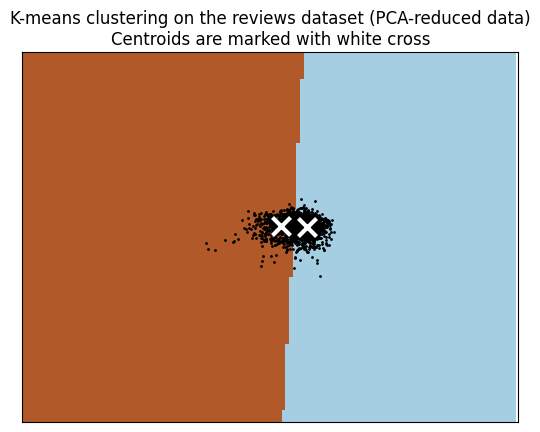

In [20]:
import matplotlib.pyplot as plt
import numpy as np
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the reviews dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In [ ]:
# all_words is a dictionary which contains the frequency of words in ‘movie_reviews’
all_words = nltk.FreqDist(movie_reviews.words())
len(all_words)

39768

In [ ]:
# Now let us build separate train and test data
print(pos_text[0])
train_data, train_labels = pos_text[: 750], pos_labels[: 750]
test_data, test_labels = pos_text[750:], pos_labels[750:]
train_data += neg_text[: 750]
train_labels += neg_labels[: 750]
test_data += neg_text[750:]
test_labels += neg_labels[750:]
print(test_data[-1], test_labels[-1])
# usually shuffle data, use indexes
train_indexes = list(range(len(train_data)))
test_indexes = list(range(len(test_data)))

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . in other words , don't dismiss this film because of its source . if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . getting the hughes brothers to direct this seems almost as ludicr

In [ ]:
from random import shuffle
# shuffle indexes
shuffle(train_indexes)
shuffle(test_indexes)
print(train_indexes)

[531, 1182, 907, 356, 82, 1188, 871, 782, 1474, 469, 307, 880, 590, 484, 840, 1059, 305, 974, 308, 373, 1472, 1359, 1320, 538, 605, 886, 560, 204, 952, 847, 404, 882, 706, 312, 785, 796, 979, 1401, 15, 558, 1257, 299, 730, 1, 887, 1405, 1461, 386, 1396, 106, 1173, 1165, 492, 38, 1369, 48, 659, 1370, 929, 1454, 92, 1446, 132, 892, 604, 994, 415, 514, 133, 1068, 1296, 852, 757, 790, 194, 128, 683, 750, 609, 791, 1349, 277, 1207, 722, 1103, 579, 507, 510, 1499, 832, 809, 226, 462, 70, 218, 1459, 567, 475, 773, 1195, 1013, 317, 1208, 358, 694, 721, 810, 696, 941, 1277, 1389, 199, 1199, 394, 72, 950, 745, 118, 1465, 885, 480, 123, 176, 1067, 913, 686, 341, 922, 627, 165, 28, 1413, 1014, 8, 39, 851, 743, 228, 24, 603, 493, 273, 1374, 161, 1271, 843, 328, 1008, 1382, 95, 728, 113, 179, 184, 797, 536, 439, 687, 788, 850, 470, 1340, 370, 625, 433, 1330, 1366, 830, 901, 1097, 656, 90, 1083, 542, 353, 1427, 970, 461, 890, 854, 1256, 350, 401, 657, 357, 1443, 1082, 1455, 1214, 1425, 1479, 776, 290

In [ ]:
len(train_indexes)

1500

In [ ]:
len(test_indexes)

500

In [ ]:
# shuffle the data using the shuffled indexes
train_data = np.array(train_data)[train_indexes]
train_labels = np.array(train_labels)[train_indexes]
test_data = np.array(test_data)[test_indexes]
test_labels = np.array(test_labels)[test_indexes]
print(test_data[10])
print(test_labels[10])

the small-scale film , in limited release , " waking ned devine " is a pleasant excursion to a time and place which allows the audience to absorb the full texture of a small town . filled with breathtaking scenery , 'characters' , and delightful music , the movie would be interesting even without a plot . the story contains several surprises which are best left unmentioned in a review . the film starts out with a sharp opening , which gives us a taste of what is to follow : country folk with an inclination for a bit of larceny . what gets things going is the fact that a winner of the lottery is apparently one of the residents in the small town ( pop 52 ) of tullymore . who that person is , and how to share in the good fortune is the mission of two longtime friends jackie ( ian bannen ) and michael ( david kelly ) . part detectives , part scalawags , they have to stay alert to the changing circumstances they face as the story unfolds . the village consists of several amusing characters 

In [ ]:
# Now create a word vectorizer based on the training data
analyzer_word, ngram_range_word = 'word', (1, 1)
tf_idf_vectorizer_word = TfidfVectorizer(analyzer=analyzer_word, ngram_range=ngram_range_word)
# use fit_trasform on the training data
train_tf_idf_vectors_word = tf_idf_vectorizer_word.fit_transform(train_data)
tf_idf_vectorizer_word.get_feature_names_out()

array(['00', '000', '0009f', ..., 'zwigoff', 'zycie', 'zzzzzzz'],
      dtype=object)

In [ ]:
# Now create a char vectorizer based on the training data
analyzer_char, ngram_range_char = 'char', (2, 6)
tf_idf_vectorizer_char = TfidfVectorizer(analyzer=analyzer_char, ngram_range=ngram_range_char)
# use fit_trasform on the training data
train_tf_idf_vectors_char = tf_idf_vectorizer_char.fit_transform(train_data)
tf_idf_vectorizer_char.get_feature_names_out()

array(['\x05\x05', '\x05\x05e', '\x05\x05eu', ..., '~can', '~canr',
       '~canra'], dtype=object)

In [ ]:
# use the vectorizer to get the test vectors, use transform here
train_tf_idf_vectors_word_and_char = scipy.sparse.hstack([train_tf_idf_vectors_word, train_tf_idf_vectors_char])
test_tf_idf_vectors_word = tf_idf_vectorizer_word.transform(test_data)
test_tf_idf_vectors_char = tf_idf_vectorizer_char.transform(test_data)
test_tf_idf_vectors_word_and_char = scipy.sparse.hstack([test_tf_idf_vectors_word, test_tf_idf_vectors_char])

In [ ]:
# now build a model
classifier_svm = LinearSVC(random_state=1)
classifier_svm.fit(train_tf_idf_vectors_word_and_char, train_labels)

LinearSVC(random_state=1)

In [ ]:
# Now evaluate your model
from sklearn.metrics import classification_report
# predict the labels by the trained model using the test data
predicted_labels = classifier_svm.predict(test_tf_idf_vectors_word_and_char)
classification_report(test_labels, predicted_labels)
# this is your sample model

'              precision    recall  f1-score   support\n\n           0       0.87      0.87      0.87       250\n           1       0.87      0.87      0.87       250\n\n    accuracy                           0.87       500\n   macro avg       0.87      0.87      0.87       500\nweighted avg       0.87      0.87      0.87       500\n'

In [ ]:
# voting classifiers
from sklearn.ensemble import VotingClassifier

In [ ]:
# define multiple classifiers
svm = LinearSVC(random_state=1)
random_forest = RandomForestClassifier(random_state=1)
logistic = LogisticRegression(random_state=1)
ensemble_hard = VotingClassifier(estimators=[('svm', svm), ('rf', random_forest), ('lr', logistic)], voting='hard')
ensemble_hard = ensemble_hard.fit(train_tf_idf_vectors_word_and_char, train_labels)

In [ ]:
# classification report
predicted_labels = ensemble_hard.predict(test_tf_idf_vectors_word_and_char)
classification_report(test_labels, predicted_labels)

'              precision    recall  f1-score   support\n\n           0       0.87      0.87      0.87       250\n           1       0.87      0.86      0.87       250\n\n    accuracy                           0.87       500\n   macro avg       0.87      0.87      0.87       500\nweighted avg       0.87      0.87      0.87       500\n'

In [ ]:
# soft voting
ensemble_soft = VotingClassifier(estimators=[('rf', random_forest), ('lr', logistic)], voting='soft')
ensemble_soft = ensemble_soft.fit(train_tf_idf_vectors_word_and_char, train_labels)

In [ ]:
# classification report
predicted_labels = ensemble_soft.predict(test_tf_idf_vectors_word_and_char)
classification_report(test_labels, predicted_labels)

'              precision    recall  f1-score   support\n\n           0       0.86      0.86      0.86       250\n           1       0.86      0.86      0.86       250\n\n    accuracy                           0.86       500\n   macro avg       0.86      0.86      0.86       500\nweighted avg       0.86      0.86      0.86       500\n'

In [ ]:
# Hindi TFIDF
hindi_text = ["ट्रंप ने इसकी घोषणा करते हुए एलन मस्क को 'ग्रेट एलन मस्क' कहा था और विवेक रामास्वामी को 'देशभक्त अमेरिकी' बताया था.", "अब डीओजीई को केवल मस्क देखेंगे और विवेक रामास्वामी इससे बाहर हो गए हैं. "]
vectorizer = TfidfVectorizer()
hindi_tfidf_vectors = vectorizer.fit_transform(hindi_text)
vectorizer.get_feature_names_out()

array(['अब', 'अम', 'इसक', 'इसस', 'एलन', 'ओज', 'और', 'करत', 'कह', 'गए',
       'बत', 'मस', 'वल', 'शभक', 'षण', 'हर'], dtype=object)

In [ ]:
vectorizer = TfidfVectorizer(token_pattern="\S+")
hindi_tfidf_vectors = vectorizer.fit_transform(hindi_text)
vectorizer.get_feature_names_out()

array(["'ग्रेट", "'देशभक्त", 'अब', "अमेरिकी'", 'इसकी', 'इससे', 'एलन',
       'और', 'करते', 'कहा', 'केवल', 'को', 'गए', 'घोषणा', 'ट्रंप',
       'डीओजीई', 'था', 'था.', 'देखेंगे', 'ने', 'बताया', 'बाहर', 'मस्क',
       "मस्क'", 'रामास्वामी', 'विवेक', 'हुए', 'हैं.', 'हो'], dtype=object)

In [ ]:
# language identification using fastText
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313472 sha256=09a5166edd076f0ed583025ed072d93f9d4084ad3475424e739b2c1178d0251d
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
# language identification using fasttext
import fasttext
from huggingface_hub import hf_hub_download

model_path = hf_hub_download(repo_id="facebook/fasttext-language-identification", filename="model.bin")
model = fasttext.load_model(model_path)
print(model.predict("Hello, world!"))

print(model.predict("Hello, world!", k=5))


(('__label__eng_Latn',), array([0.61224753]))
(('__label__eng_Latn', '__label__vie_Latn', '__label__nld_Latn', '__label__pol_Latn', '__label__deu_Latn'), array([0.61224753, 0.21323682, 0.09696738, 0.01359863, 0.01319415]))


In [ ]:
text = "ट्रंप ने इसकी घोषणा करते हुए एलन मस्क को 'ग्रेट एलन मस्क' कहा था और विवेक रामास्वामी को 'देशभक्त अमेरिकी' बताया था."
print(model.predict(text))

(('__label__hin_Deva',), array([0.99916303]))


In [ ]:
# sentiment analysis using Huggingface Transformers
# https://huggingface.co/blog/sentiment-analysis-python
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["I love you", "I hate you"]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [ ]:
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
specific_model(data)

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cuda:0


[{'label': 'POS', 'score': 0.9916695356369019},
 {'label': 'NEG', 'score': 0.9806600213050842}]